# Semianr 10 - Applied Quantitative Logistics

## Particle Swarm Optimization (PSO) - Binary

In [133]:
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Hub Location Allocation

In [134]:
def hubLocation():
    
    ### Customer Data
    xc = [74, 146, 41, 70, 176, 60, 1, 54, 149, 60, 132, 199, 2,
          31, 176, 127, 71, 78, 71, 151, 145, 37, 157, 139, 27,
          138, 97, 104, 137, 83, 67, 196, 152, 149, 148, 56, 64, 31, 31, 52]
    
    yc = [79, 95, 149, 185, 106, 175, 144, 63, 165, 81, 164, 132, 110, 118,
          29, 13, 52, 158, 73, 172, 103, 172, 69, 90, 104, 102, 70, 162, 192,
          195, 178, 153, 41, 57, 67, 5, 83, 146, 122, 2]
    
    d = [20, 15, 99, 32, 12, 8, 86, 26, 56, 38, 27, 15, 87, 83, 94, 34, 79,
         56, 10, 46, 99, 67, 43, 84, 45, 81, 83, 89, 30, 78, 78, 21, 75, 93,
         70, 16, 20, 48, 88, 54]
    
    N = len(xc)     # Number of customers
    
    ### Service Center Data
    xs = [2, 52, 166, 126, 100, 165, 198, 76, 76, 105, 44,
          125, 82, 25, 5, 58, 74, 75, 171, 51]
    
    ys = [126, 196, 104, 28, 4, 32, 122, 35, 123, 45, 2, 158,
          25, 101, 109, 74, 102, 159, 42, 100]
    
    M = len(xs)     # Number of potential service centers
    
    D = np.zeros([N-1, M-1])
    for i in range(N-1):
        for j in range(M-1):
            D[i][j] = math.sqrt(abs(xc[i]-xs[j] + yc[i]-ys[j]))
    
    model = {'N': N,
             'M': M,
             'xc': xc,
             'yc': yc,
             'xs': xs,
             'ys': ys,
             'd': d,
             'D': D}
    
    return model

### Create Random Solution

In [135]:
def createRandomSolution(model):
    M = model['M']
    f = list(np.random.randint(0, 2, M))
    
    return f

### Cost Function

In [136]:
def myCost(f, model):
    
    global NFE
    
    if pd.isna(NFE):
        NFE = 0
        
    NFE += 1
    
    if (np.all(np.array(f) == 0)):
        z = math.inf
        return z
    
    N = model['N']
    M = model['M']
    D = model['D']
    
    D_min = np.zeros(N)
    
    for i in range(0, N-1):
        D_temp = []
        for j in range(0, M-1):
            if f[j] == 1:
                D_temp.append(D[i][j])
                
        D_min[i] = min(D_temp)
        
    z = sum(np.array(model['d']) * np.array(D_min))
    
    return z

### PSO Algorithm - Binary

In [137]:
### Problem Definition
model = hubLocation()

nPar = model['M']

global NFE
NFE = 0

# Store all NFE
nfe = [NFE]

# PSO Parameters
maxIter = 200
swarmSize = 40
C1 = 2
C2 = 4-C1

Position, Costs, Velocity, LBPosition, LBCosts = [], [], [], [], []

# Store Global Solution
GBPosition = createRandomSolution(model)
GBCost = math.inf

BestCost_list = [GBCost]

# Initialize Swarms
for i in range(swarmSize):
    Position.append(createRandomSolution(model))
    Velocity.append(list(np.random.random_sample(nPar)))
    Costs.append(myCost(Position[i], model))
    
    LBPosition.append(Position[i])
    LBCosts.append(Costs[i])
    
    if LBCosts[i] < GBCost:
        GBPosition = LBPosition[i]
        GBCost = LBCosts[i]
        
### PSO Main Loop
for it in range(maxIter):
    
    for ii in range(swarmSize):
        
        # Velocity Update
        Velocity[ii] = list(C1*np.random.random()*(np.array(LBPosition[ii]) - np.array(Position[ii])) \
                           + C2*np.random.random()*(np.array(GBPosition) - np.array(Position[ii])))
        
        # Position Update
        SigV = 1/(1+np.exp(-np.array(Velocity[ii])))
        my_rand = np.random.random_sample(nPar)
        Position[ii] = [int(SigV[k] > my_rand[k]) for k in range(len(SigV))]
        Costs[ii] = myCost(Position[ii], model)
        
        # Update Global and Local Best
        if Costs[ii] < LBCosts[ii]:
            LBPosition[ii] = Position[ii]
            LBCosts[ii] = Costs[ii]
            
        if LBCosts[ii] < GBCost:
            GBPosition = LBPosition[ii]
            GBCost = LBCosts[ii]
            
    BestCost_list.append(GBCost)
    
    # Append NFE to my array
    nfe.append(NFE)
    
    print(f'Iteration: {it}, NFE: {nfe[-1]}, Best Cost: {BestCost_list[it]}')

Iteration: 0, NFE: 80, Best Cost: inf
Iteration: 1, NFE: 120, Best Cost: 4550.967682399369
Iteration: 2, NFE: 160, Best Cost: 4550.967682399369
Iteration: 3, NFE: 200, Best Cost: 4497.9727282485
Iteration: 4, NFE: 240, Best Cost: 4497.9727282485
Iteration: 5, NFE: 280, Best Cost: 4497.9727282485
Iteration: 6, NFE: 320, Best Cost: 4497.9727282485
Iteration: 7, NFE: 360, Best Cost: 4496.225004958301
Iteration: 8, NFE: 400, Best Cost: 4484.100691186158
Iteration: 9, NFE: 440, Best Cost: 4484.100691186158
Iteration: 10, NFE: 480, Best Cost: 4484.100691186158
Iteration: 11, NFE: 520, Best Cost: 4394.269962440834
Iteration: 12, NFE: 560, Best Cost: 4394.269962440834
Iteration: 13, NFE: 600, Best Cost: 4394.269962440834
Iteration: 14, NFE: 640, Best Cost: 4297.825307612508
Iteration: 15, NFE: 680, Best Cost: 4297.825307612508
Iteration: 16, NFE: 720, Best Cost: 4297.825307612508
Iteration: 17, NFE: 760, Best Cost: 4297.825307612508
Iteration: 18, NFE: 800, Best Cost: 4297.825307612508
Iterati

### Results

Text(0, 0.5, 'Best Cost')

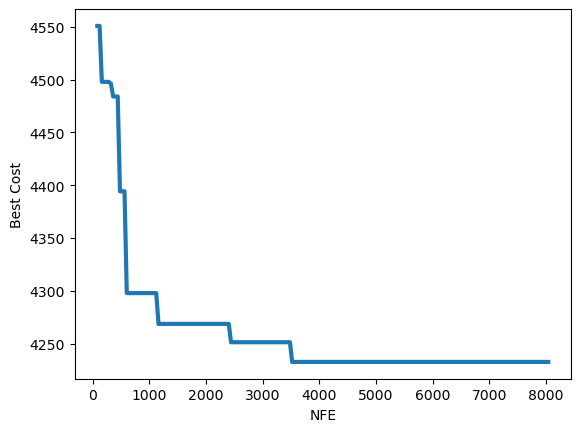

In [138]:
# Plot the result
plt.plot(nfe, BestCost_list, linewidth = 3)
plt.xlabel('NFE')
plt.ylabel('Best Cost')

# HW7 - Applied Quantitative Logistics

Implement PSO Algorithm for continuous problem. You can solve sphere() problem as we did before in previous semenar. Finally compare your result with SA algorithm on the same plot.

Hint: PSO has continuous nature initially. After caculating velocity, there is no neet to convert it to binary by sigma. Just apply the folmula for updating position based on new velovity as we discussed during seminar.

Instruction for submission:

- Please submit your solutions in (.ipynb) format to my email (msohrabi@hse.ru).

- Deadline: **May 5, 2023, 11:59 pm.**

- The subject of the email and file name: **[HW7_AQL]-YOUR_NAME**

### PSO Algorithm - Continuous

In [139]:
def sphere(x):
    
    global NFE
    
    if pd.isna(NFE):
        NFE = 0
        
    NFE += 1
    
    z = [item**2 for item in x]
    
    return sum(z)
    

In [140]:
### YOUR CODE HERE ###

In [141]:
import random

def createRandomSolution(val):
    return list(map(lambda x: random.uniform(x[0], x[1]), val))

val = [(-4, 4)] * 10
x = createRandomSolution(val)

sphere(x)


42.9553511589219

In [142]:
### PSO Algorithm - Continuous
nPar = len(val)

global NFE
NFE = 0

# Store all NFE
nfe = [NFE]

# PSO Parameters
maxIter = 200
swarmSize = 40
C1 = 2
C2 = 4-C1
w = 0.9
wdamp = 0.99

Position, Costs, Velocity, LBPosition, LBCosts = [], [], [], [], []

# Store Global Solution
GBPosition = createRandomSolution(val)
GBCost = sphere(GBPosition)

BestCost_list = [GBCost]

# Initialize Swarms
for i in range(swarmSize):
    Position.append(createRandomSolution(val))
    Velocity.append(list(np.random.uniform(-1, 1, nPar)))
    Costs.append(sphere(Position[i]))
    
    LBPosition.append(Position[i])
    LBCosts.append(Costs[i])
    
    if LBCosts[i] < GBCost:
        GBPosition = LBPosition[i]
        GBCost = LBCosts[i]
        
### PSO Main Loop
for it in range(maxIter):
    
    for ii in range(swarmSize):
        
        # Velocity Update
        Velocity[ii] = list(w*np.array(Velocity[ii]) \
                           + C1*np.random.random()*(np.array(LBPosition[ii]) - np.array(Position[ii])) \
                           + C2*np.random.random()*(np.array(GBPosition) - np.array(Position[ii])))
        
        # Position Update
        Position[ii] = list(np.array(Position[ii]) + np.array(Velocity[ii]))
        Position[ii] = [min(max(Position[ii][j], val[j][0]), val[j][1]) for j in range(nPar)]
        Costs[ii] = sphere(Position[ii])
        
        # Update Global and Local Best
        if Costs[ii] < LBCosts[ii]:
            LBPosition[ii] = Position[ii]
            LBCosts[ii] = Costs[ii]
            
        if LBCosts[ii] < GBCost:
            GBPosition = LBPosition[ii]
            GBCost = LBCosts[ii]
            
    BestCost_list.append(GBCost)
    
    # Append NFE to my array
    nfe.append(NFE)
    
    # Update Inertia Weight
    w *= wdamp

    print(f'Iteration: {it}, NFE: {nfe[-1]}, Best Cost: {BestCost_list[it]}')

Iteration: 0, NFE: 81, Best Cost: 31.733387558991954
Iteration: 1, NFE: 121, Best Cost: 8.176899997864336
Iteration: 2, NFE: 161, Best Cost: 8.158799855897273
Iteration: 3, NFE: 201, Best Cost: 8.158799855897273
Iteration: 4, NFE: 241, Best Cost: 4.792114369027085
Iteration: 5, NFE: 281, Best Cost: 3.3880229856541813
Iteration: 6, NFE: 321, Best Cost: 3.380584024738126
Iteration: 7, NFE: 361, Best Cost: 3.2115578040147903
Iteration: 8, NFE: 401, Best Cost: 3.176580896085281
Iteration: 9, NFE: 441, Best Cost: 2.435654958697922
Iteration: 10, NFE: 481, Best Cost: 2.2670392115270297
Iteration: 11, NFE: 521, Best Cost: 2.2670392115270297
Iteration: 12, NFE: 561, Best Cost: 2.2670392115270297
Iteration: 13, NFE: 601, Best Cost: 2.2670392115270297
Iteration: 14, NFE: 641, Best Cost: 1.7945011648945994
Iteration: 15, NFE: 681, Best Cost: 1.6934959248668022
Iteration: 16, NFE: 721, Best Cost: 1.6934959248668022
Iteration: 17, NFE: 761, Best Cost: 1.6934959248668022
Iteration: 18, NFE: 801, Bes

Text(0, 0.5, 'Best Cost')

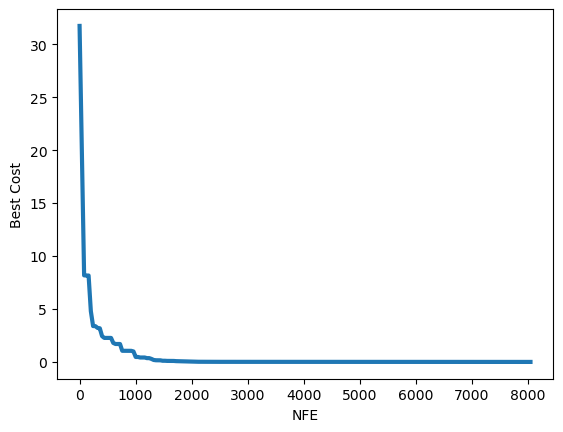

In [143]:
# Plot the result
plt.plot(nfe, BestCost_list, linewidth = 3)
plt.xlabel('NFE')
plt.ylabel('Best Cost')

In [144]:
### Problem Definition -------------------------------------

### SA Parameters ------------------------------------
maxIt = 10000    # maximum number of iteration
T0 = 100       # initial temprature
alpha = 0.99   # temprature reduction rate


def SA(val, maxIt, T0, alpha):
    ### Initialization -------------------------------
    sol = createRandomSolution(val)
    cost = sphere(sol)

    BestSol = sol
    BestCost = cost

    global NFE
    NFE = 0
    # Store all NFE
    nfe = [NFE]

    BestCost_list = np.zeros(maxIt)     # Array to hold the best results

    T = T0

    for it in range(1, maxIt+1):
        newsol = create_neighbor(sol,val)
        newcost = sphere(newsol)
        
        if newcost <= cost:     # If NEWSOL is better than SOL
            sol = newsol
            cost = newcost
            
        else:                   # If NEWSOL is NOT better than SOL
            DELTA = newcost - cost
            P = math.exp(-DELTA/T)
            
            r = np.random.random()
            
            if P >= r:
                sol = newsol
                cost = newcost
                
        if cost <= BestCost:
            BestSol = sol
            BestCost = cost
            
        BestCost_list[it-1] = BestCost

        # Update Temprature
        T = alpha*T

        # Append NFE to my array
        nfe.append(NFE)
        
        # Display Iteration Information
        if it % 500 == 0: 
            print(f'Iteration: {it}, NFE: {nfe[-1]} BestCost = {BestCost_list[it-1]}')

    return BestSol, BestCost_list, nfe
    

def create_neighbor(tour, value):
    n = len(tour)
    temp = tour.copy()
    i = random.randrange(n)
    delta = random.uniform(-1, 1) * (value[i][1] - value[i][0])
    new_tour = [xi + delta if j == i else xi for j, xi in enumerate(temp)]
    return new_tour




In [145]:
BestSol, BestCost_list2, nfe_2  = SA(val,maxIt, T0, alpha)

Iteration: 500, NFE: 500 BestCost = 3.2146027282651515
Iteration: 1000, NFE: 1000 BestCost = 0.3596660270330602
Iteration: 1500, NFE: 1500 BestCost = 0.2008178386558604
Iteration: 2000, NFE: 2000 BestCost = 0.10064217492861369
Iteration: 2500, NFE: 2500 BestCost = 0.08943564394889926
Iteration: 3000, NFE: 3000 BestCost = 0.04224583282660974
Iteration: 3500, NFE: 3500 BestCost = 0.03160300703175769
Iteration: 4000, NFE: 4000 BestCost = 0.010851524807530306
Iteration: 4500, NFE: 4500 BestCost = 0.009936039135412524
Iteration: 5000, NFE: 5000 BestCost = 0.005006250365254086
Iteration: 5500, NFE: 5500 BestCost = 0.005006250365254086
Iteration: 6000, NFE: 6000 BestCost = 0.0047421500444588755
Iteration: 6500, NFE: 6500 BestCost = 0.0047421500444588755
Iteration: 7000, NFE: 7000 BestCost = 0.00462616209082686
Iteration: 7500, NFE: 7500 BestCost = 0.00462616209082686
Iteration: 8000, NFE: 8000 BestCost = 0.00462616209082686
Iteration: 8500, NFE: 8500 BestCost = 0.0029716410326871266
Iteration

Text(0, 0.5, 'Best Cost')

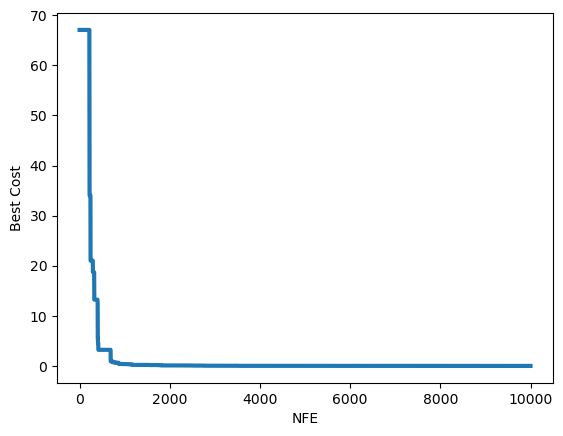

In [146]:


plt.plot(nfe_2[:10000], BestCost_list2, linewidth = 3)
plt.xlabel('NFE')
plt.ylabel('Best Cost')

### Results

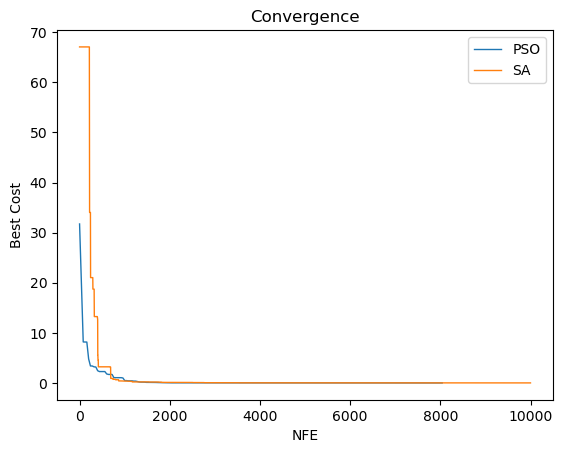

In [147]:
# Plot the result

### YOUR CODE HERE ###


# Plot the result
plt.plot(nfe,BestCost_list, linewidth = 1, label = "PSO")
plt.plot(nfe_2[:10000],BestCost_list2, linewidth = 1, label = "SA")
plt.title("Convergence")
plt.legend()
plt.xlabel('NFE')
plt.ylabel('Best Cost')
plt.show()

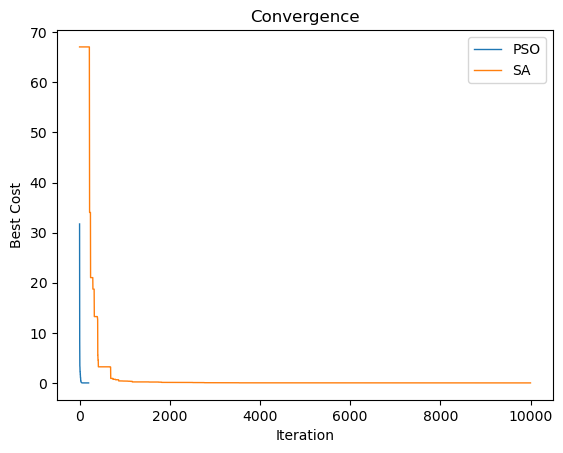

In [148]:
it = np.arange(len(BestCost_list)) 
it2 = np.arange(len(BestCost_list2)) 
# Plot the result
plt.plot(it,BestCost_list, linewidth = 1, label = "PSO")
plt.plot(it2,BestCost_list2, linewidth = 1, label = "SA")
plt.title("Convergence")
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Best Cost')
plt.show()